In [1]:
# set working directory
import os
path = "/Users/brandonye/Desktop/fa22/QBIO 490/fa22_qbio_490_brandon/final_project_group3/outputs"
try:
    os.makedirs(path)
except FileExistsError:
    os.chdir(path)

#imports necessary packages
import cptac
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

# downloads the Luad dataset
cptac.download(dataset="LUAD")
luad = cptac.Luad()

# extracts data
#clinical_data = luad.get_clinical()
transcriptomic_data = luad.get_transcriptomics()
protein_data = luad.get_proteomics()
protein_data.columns = protein_data.columns.get_level_values(0) 

In [2]:
#Subsets dataframes to only include genesthat are in both the transcriptomic and proteomic data
shared_rna_prot = np.intersect1d(transcriptomic_data.columns, protein_data.columns)
rna_shared = transcriptomic_data.loc[:, shared_rna_prot]
prot_shared = protein_data.loc[:, shared_rna_prot]

#outputs number of patients
print(prot_shared.index)

Index(['C3L-00001', 'C3L-00009', 'C3L-00080', 'C3L-00083', 'C3L-00093',
       'C3L-00094', 'C3L-00095', 'C3L-00140', 'C3L-00144', 'C3L-00263',
       ...
       'C3N-02423.N', 'C3N-02424.N', 'C3N-02433.N', 'C3N-02529.N',
       'C3N-02572.N', 'C3N-02582.N', 'C3N-02586.N', 'C3N-02587.N',
       'C3N-02588.N', 'C3N-02729.N'],
      dtype='object', name='Patient_ID', length=211)


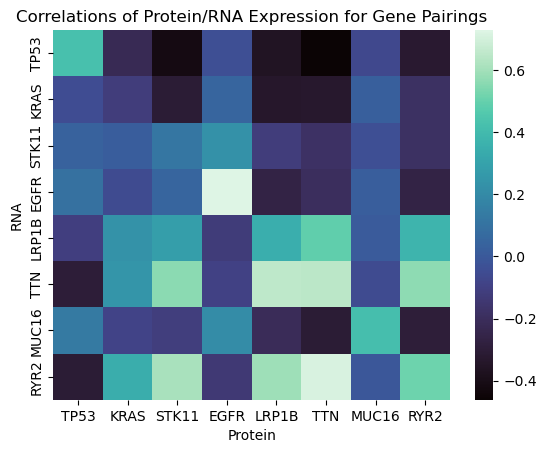

In [3]:
genelist = ["TP53", "KRAS", "STK11", "EGFR", "LRP1B", "TTN", "MUC16", "RYR2"]
#sets list of most communly mutated genes in LA patients

geneindexlist = []

#generates a list with indices for desired genes, then finds the corresponding gene data
for gene in genelist:
    geneindexlist.append(protein_data.columns.get_loc(gene))
ncomparisons = len(geneindexlist)
gene_names = protein_data.columns[geneindexlist]

#declares dataframe
corr_df = pd.DataFrame(np.ndarray(shape=(ncomparisons, ncomparisons), dtype=np.float16),
                      index = gene_names,
                      columns = gene_names)

#generates dataframe with p-values
for g1 in gene_names:
    for g2 in gene_names:
        #calculates correlations
        corr, pval = stats.spearmanr(rna_shared[g1], prot_shared[g2], nan_policy="omit")
        corr_df.loc[g1, g2] = corr

#plots the heat map
plot = sns.heatmap(
    corr_df,
    cmap='mako',
)
plot.set_xlabel('Protein', fontsize=10)
plot.set_ylabel('RNA', fontsize=10)
plt.title('Correlations of Protein/RNA Expression for Gene Pairings')
plt.savefig('heatmap_RNA_Protein.jpg')

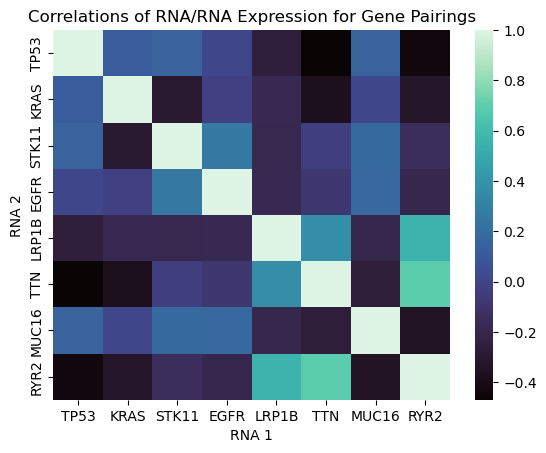

In [4]:
genelist = ["TP53", "KRAS", "STK11", "EGFR", "LRP1B", "TTN", "MUC16", "RYR2"]
#sets list of most communly mutated genes in LA patients

geneindexlist = []

#generates a list with indices for desired genes, then finds the corresponding gene data
for gene in genelist:
    geneindexlist.append(protein_data.columns.get_loc(gene))
ncomparisons = len(geneindexlist)
gene_names = protein_data.columns[geneindexlist]

#declares dataframe
corr_df = pd.DataFrame(np.ndarray(shape=(ncomparisons, ncomparisons), dtype=np.float16),
                      index = gene_names,
                      columns = gene_names)

#generates dataframe with p-values
for g1 in gene_names:
    for g2 in gene_names:
        corr, pval = stats.spearmanr(rna_shared[g1], rna_shared[g2], nan_policy="omit")
        corr_df.loc[g1, g2] = corr

#plots the heat map
plot = sns.heatmap(
    corr_df,
    cmap='mako',
)
plot.set_xlabel('RNA 1', fontsize=10)
plot.set_ylabel('RNA 2', fontsize=10)
plt.title('Correlations of RNA/RNA Expression for Gene Pairings')
plt.savefig('heatmap_RNA_RNA.jpg')

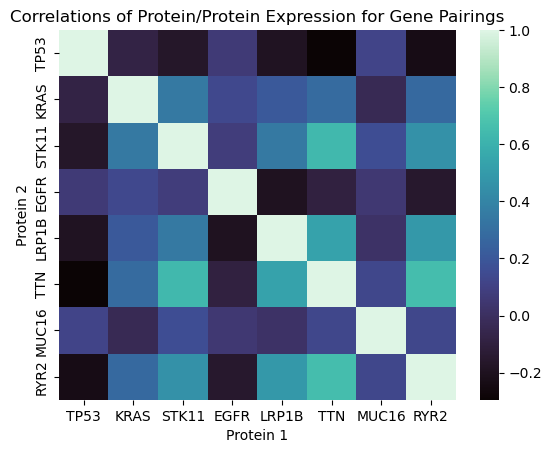

In [5]:
genelist = ["TP53", "KRAS", "STK11", "EGFR", "LRP1B", "TTN", "MUC16", "RYR2"]
#sets list of most communly mutated genes in LA patients

geneindexlist = []

#generates a list with indices for desired genes, then finds the corresponding gene data
for gene in genelist:
    geneindexlist.append(protein_data.columns.get_loc(gene))
ncomparisons = len(geneindexlist)
gene_names = protein_data.columns[geneindexlist]

#declares dataframe
corr_df = pd.DataFrame(np.ndarray(shape=(ncomparisons, ncomparisons), dtype=np.float16),
                      index = gene_names,
                      columns = gene_names)

#generates dataframe with p-values
for g1 in gene_names:
    for g2 in gene_names:
        corr, pval = stats.spearmanr(prot_shared[g1], prot_shared[g2], nan_policy="omit")
        corr_df.loc[g1, g2] = corr

#plots the heat map
plot = sns.heatmap(
    corr_df,
    cmap='mako',
)
plot.set_xlabel('Protein 1', fontsize=10)
plot.set_ylabel('Protein 2', fontsize=10)
plt.title('Correlations of Protein/Protein Expression for Gene Pairings')
plt.savefig('heatmap_Protein_Protein.jpg')